In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marketing-data/marketing_data.csv


# Exploratory & Statistical Analysis


### Task Details
You're a marketing analyst and you've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be. You need to analyze the data set to understand this problem and propose data-driven solutions.

### Expected Submission
Submit a well documented notebook with these three sections:

### Section 01: Exploratory Data Analysis
* Are there any null values or outliers? How will you wrangle/handle them?
* Are there any variables that warrant transformations?
* Are there any useful variables that you can engineer with the given data?
* Do you notice any patterns or anomalies in the data? Can you plot them?
### Section 02: Statistical Analysis

Please run statistical tests in the form of regressions to answer these questions & propose data-driven action recommendations to your CMO. Make sure to interpret your results * with non-statistical jargon so your CMO can understand your findings.

* What factors are significantly related to the number of store purchases?
* Does US fare significantly better than the Rest of the World in terms of total purchases?
* Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test
* Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? What other factors are * significantly related to amount spent on fish? (Hint: use your knowledge of interaction variables/effects)
* Is there a significant relationship between geographical regional and success of a campaign?
### Section 03: Data Visualization
Please plot and visualize the answers to the below questions.

* Which marketing campaign is most successful?
* What does the average customer look like for this company?
* Which products are performing best?
* Which channels are underperforming?
Evaluation
* This is not a formal competition, so results won't be measured using a strict metric. Rather, what one would like to see is a well-defined process of exploratory and statistical analysis with insightful conclusions.


## Preparing the data

In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib as mpl

colors = ['#05445E','#189AB4','#75E6DA','#9DAFB0', '#4D707E', '#56B66B']

mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right']= False
mpl.rcParams['axes.spines.left']= False
mpl.rcParams['axes.spines.bottom'] = True

In [3]:
data = pd.read_csv("/kaggle/input/marketing-data/marketing_data.csv")
data.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
161,10451,1965,Graduation,Together,"$29,672.00",1,1,3/12/13,6,9,...,3,6,0,0,0,0,0,0,0,SA
1716,3839,1958,Basic,Single,"$15,056.00",1,1,5/3/13,76,6,...,3,5,0,0,0,0,0,0,0,SP
1009,6543,1945,Master,Together,"$62,847.00",0,0,1/15/13,45,521,...,4,2,0,0,0,0,0,0,0,CA
1019,2936,1982,Master,Together,"$23,661.00",1,0,12/4/13,46,18,...,3,7,0,0,0,0,0,0,0,SA
1533,5899,1950,PhD,Together,"$5,648.00",1,1,3/13/14,68,28,...,0,20,1,0,0,0,0,0,0,US


In [4]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [6]:
data.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data = data.rename(columns={' Income ' : "Income"})

# Section 01

## Feature Engineering

Looking at the data there are several column that can we process to create new column

* Age : can be derived fron Year_Birth
* Age Group : can be derived from Age
* Totalchild : sum of kidhome and Teenhome

and there are also column that need to be pre-process that is 
* Income : change into float
* Dt_Customer : change into pandas Datetime

In [8]:
# clean income 
def clean_income(row) : 
    income = re.findall('\d+,\d+', row)
    income = re.sub('\W', '', income)
    print(income)

    return income 

def get_age_group(age) : 
    if 18 <= age <= 35 : 
        return 'Millenial' 
    elif 35 < age <= 50 : 
        return 'Gen X'
    elif 50 < age <= 70 : 
        return 'Boomer'
    else : 
        return 'Silent'

data['Age'] = 2020 - data['Year_Birth']
data['Income'] = data['Income'].replace('[\$,]', '', regex=True).astype(float)
data['Age Group'] = data['Age'].apply(get_age_group)
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
data['Totalchild'] = data['Kidhome'] + data['Teenhome']

To make my exploration easier i divided our data into multiple categories that is 

* behavioral 
* demographics 
* psychographics 
* geographics 
* products

In [9]:
col_behavioral = [
    'MntWines', 
    'MntFruits', 
    'MntMeatProducts', 
    'MntFishProducts', 
    'MntSweetProducts', 
    'MntGoldProds', 
    'NumDealsPurchases', 
    'NumWebPurchases', 
    'NumCatalogPurchases', 
    'NumStorePurchases', 
    'NumWebVisitsMonth', 
    'Recency'
]

col_demographics = [
    'Year_Birth', 
    'Education', 
    'Marital_Status', 
    'Income', 
    'Kidhome', 
    'Teenhome', 
    'Dt_Customer'
] 

col_psychographics = [
'AcceptedCmp1', 
'AcceptedCmp2', 
'AcceptedCmp3', 
'AcceptedCmp4', 
'AcceptedCmp5', 
'Response', 
'Complain'

]

col_geographics = ['Country']

col_products = [
'MntWines', 
'MntFruits', 
'MntMeatProducts', 
'MntFishProducts', 
'MntSweetProducts', 
'MntGoldProds'
]

## Are there any null values or outliers? How will you wrangle/handle them?

looking at this data, i found that there are several null values in feature "Income"

since we only have 24 rows with missing value, i will just remove those rows

In [10]:
data.isnull().sum()


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
Age                     0
Age Group               0
Totalchild              0
dtype: int64

In [11]:
# drop missing value 
data = data.dropna()

In [12]:
# columns to be investigated
col_demographics

['Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer']

In [13]:
data.groupby('Marital_Status').count()['ID']

Marital_Status
Absurd        2
Alone         3
Divorced    232
Married     857
Single      471
Together    573
Widow        76
YOLO          2
Name: ID, dtype: int64

On Marital Status Column, we can see that we have an anomalies. "Absurd", "Alone" and "YOLO" is not a marital status, at least by my understanding. Since the anomalies is responsible for only 7 rows, i decided to drop those rows

In [14]:
data = data[~data['Marital_Status'].isin(['Absurd', 'Alone', 'YOLO'])]

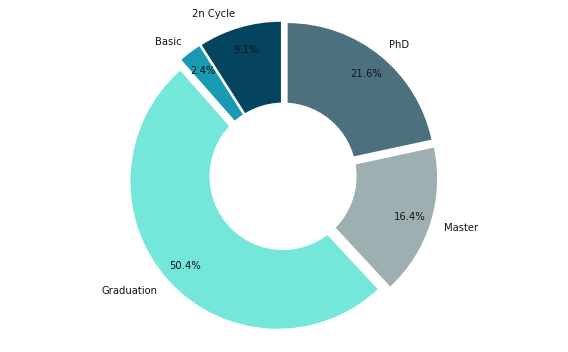

In [15]:
df = data['ID'].groupby(data['Education']).count()

# Pie chart
#colors
explode = (0.05,0.05,0.05,0.05,0.05)
 
fig1, ax1 = plt.subplots(figsize=(8, 5))
patches, texts, autotexts = ax1.pie(df.values, colors = colors, labels=df.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

for text in texts:
    text.set_color('#131313')
for autotext in autotexts:
    autotext.set_color('#131313')

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

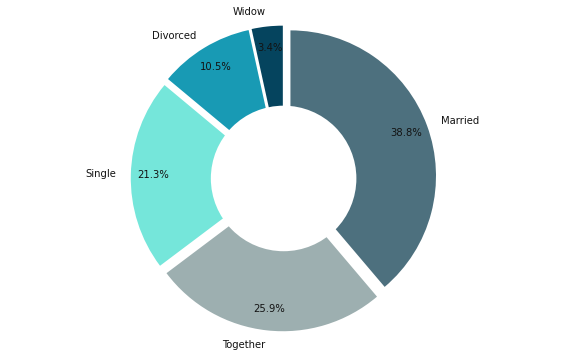

In [16]:
df = data['ID'].groupby(data['Marital_Status']).count()
df = df.sort_values()[-5:]

# Pie chart
#colors
explode = (0.05,0.05,0.05,0.05,0.05)
 
fig1, ax1 = plt.subplots(figsize=(8, 5))
patches, texts, autotexts = ax1.pie(df.values, colors = colors, labels=df.index, 
                                    autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

for text in texts:
    text.set_color('#131313')
for autotext in autotexts:
    autotext.set_color('#131313')

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

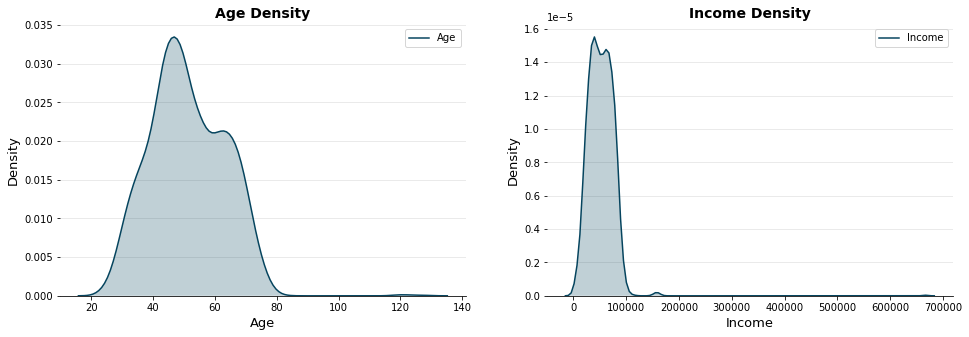

In [17]:
fig1, ax = plt.subplots(1, 2, figsize=(16, 5))

sns.kdeplot(data['Age'], ax=ax[0], shade=True, color=colors[0])

ax[0].set_title("Age Density", fontsize=14, fontweight='bold')
ax[0].set_ylabel('Density', fontsize=13)
ax[0].set_xlabel('Age', fontsize=13)
ax[0].yaxis.grid(alpha=0.33)
ax[0].set_axisbelow(True)

sns.kdeplot(data['Income'], ax=ax[1], shade=True, color=colors[0])

ax[1].set_title("Income Density", fontsize=14, fontweight='bold')
ax[1].set_ylabel('Density', fontsize=13)
ax[1].set_xlabel('Income', fontsize=13)
ax[1].yaxis.grid(alpha=0.33)
ax[1].set_axisbelow(True)

we can see that there is an anomaly in Age and an outlier in Income, first we are going to investigate further Age column

Text(0.5, 0, 'Age')

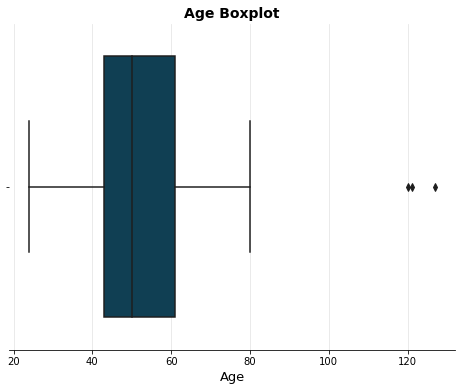

In [18]:
fig, ax = plt.subplots(figsize=(8,6))

sns.boxplot(data['Age'], ax=ax, palette=colors)

ax.xaxis.grid(alpha=0.33)
ax.set_axisbelow(True)

ax.set_title("Age Boxplot", fontsize=14, fontweight='bold')
ax.set_xlabel('Age', fontsize=13)

Here we detect that there are 3 people with Age anomalies, those people is over than 120 years old! which is highly unlikely. Since it is only 3 people we will solve this problem by drop those 3 people on our data

In [19]:
# remove Age outlier
data = data[data['Age'] < 120]

now we are going to investigate further our income columns

Text(0.5, 0, 'Income')

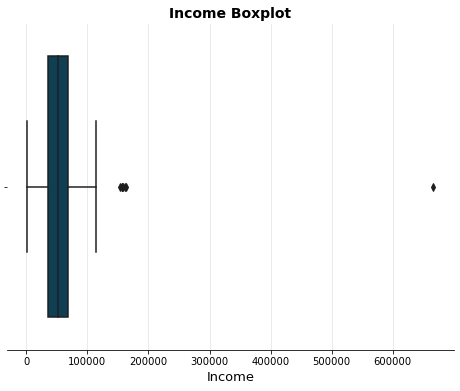

In [20]:
fig, ax = plt.subplots(figsize=(8,6))

sns.boxplot(data['Income'], ax=ax, palette=colors)

ax.xaxis.grid(alpha=0.33)
ax.set_axisbelow(True)

ax.set_title("Income Boxplot", fontsize=14, fontweight='bold')
ax.set_xlabel('Income', fontsize=13)

Here we see two anomalies, person with income on range 100.000 to 200.000 and person with income of  600.000 . 

While the first one is still possible, the second one however it is highly unlikely a person having an income over 600.000$

to solve this problem i decided to drop the people with income over 600.000$

In [21]:
# remove Income outlier
data = data[data['Income'] < 200000]

Text(0.5, 0, 'Income')

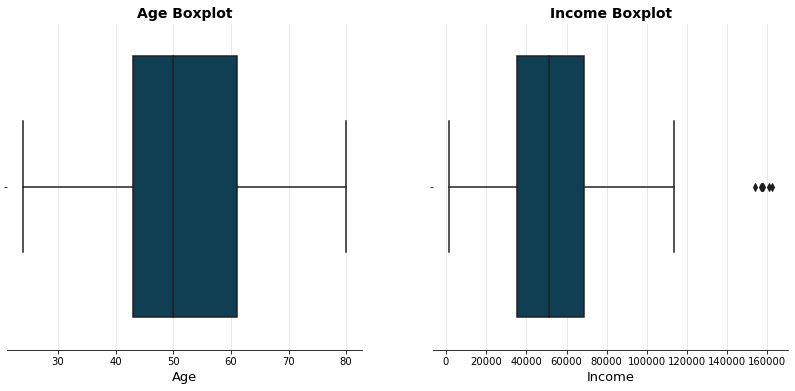

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))

sns.boxplot(data['Age'], ax=ax[0], palette=colors)

ax[0].xaxis.grid(alpha=0.33)
ax[0].set_axisbelow(True)

ax[0].set_title("Age Boxplot", fontsize=14, fontweight='bold')
ax[0].set_xlabel('Age', fontsize=13)

sns.boxplot(data['Income'], ax=ax[1], palette=colors)

ax[1].xaxis.grid(alpha=0.33)
ax[1].set_axisbelow(True)

ax[1].set_title("Income Boxplot", fontsize=14, fontweight='bold')
ax[1].set_xlabel('Income', fontsize=13)

### Products

now we are going to investigate whether there are outlier/anomalies on Products columns

In [23]:
df = data[col_products]

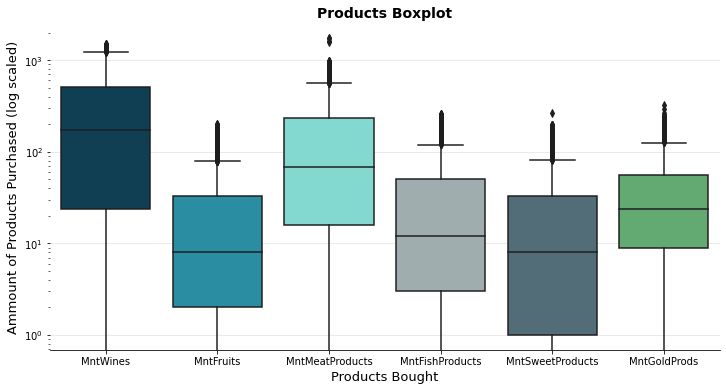

In [24]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df, palette=colors)

ax.set_yscale('log')
ax.set_title("Products Boxplot", fontsize=14, fontweight='bold')
ax.set_xlabel('Products Bought', fontsize=13)
ax.set_ylabel('Ammount of Products Purchased (log scaled)', fontsize=13)
ax.yaxis.grid(alpha=0.33)
ax.set_axisbelow(True)

Although if we look at the chart we can see an outlier for every Products, but in my opinion i think it is not a true outlier. We cannot judge all customers to buy an amount of goods that can be said to be "normal", for example: a customer may be a merchant who needs a lot of goods

So in this case i'll leave it as it is

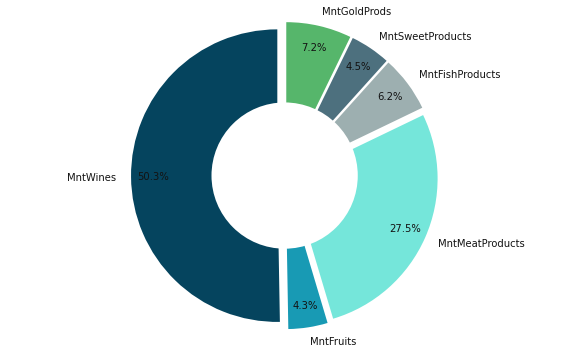

In [25]:
df = data[col_products].sum()

# Pie chart
#colors
explode = (0.05,0.05,0.05,0.05,0.05,0.05)
 
fig1, ax1 = plt.subplots(figsize=(8, 5))
patches, texts, autotexts = ax1.pie(df.values, colors = colors, labels=df.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

for text in texts:
    text.set_color('#131313')
for autotext in autotexts:
    autotext.set_color('#131313')

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

## Do you notice any patterns or anomalies in the data? Can you plot them?

### Customer Generation pattern on the market

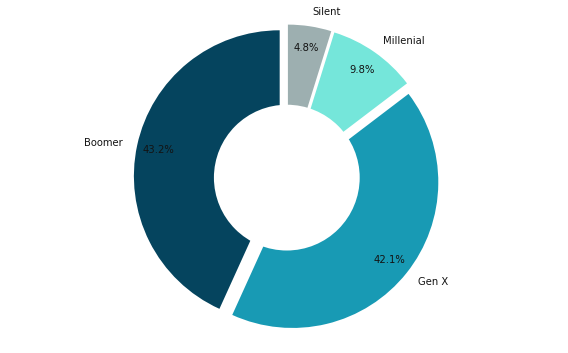

In [26]:
df = data['ID'].groupby(data['Age Group']).count()
# Pie chart
#colors
explode = (0.05,0.05,0.05,0.05)
 
fig1, ax1 = plt.subplots(figsize=(8, 5))
patches, texts, autotexts = ax1.pie(df.values, colors = colors, labels=df.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

for text in texts:
    text.set_color('#131313')
for autotext in autotexts:
    autotext.set_color('#131313')

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

Market is more dominated with person on Boomer Generation (43.2%) and Generation X (42.1%)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


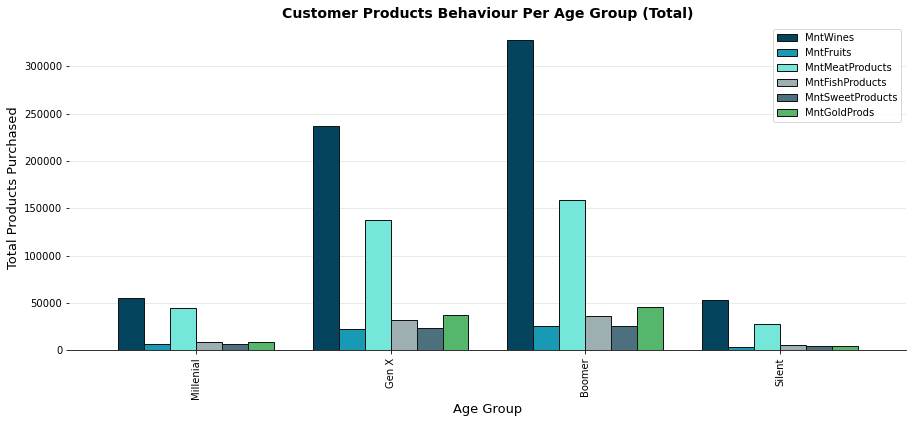

In [27]:
fig, ax = plt.subplots(figsize=(15, 6))

df = data[col_products+['Age']]

bins = [18, 35, 50, 70, 150]

labels = ['Millenial', 'Gen X', 'Boomer', 'Silent']
df['Age_Group'] = pd.cut(df.Age, bins=bins, labels=labels)
df = df.groupby('Age_Group').sum().reset_index()
df.plot(x='Age_Group', y=col_products, kind='bar', ax=ax, color=colors, width=0.8, edgecolor='#131313')

ax.set_title("Customer Products Behaviour Per Age Group (Total)", fontsize=14, fontweight='bold')
ax.set_ylabel('Total Products Purchased', fontsize=13)
ax.set_xlabel('Age Group', fontsize=13)
ax.yaxis.grid(alpha=0.33)
ax.set_axisbelow(True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


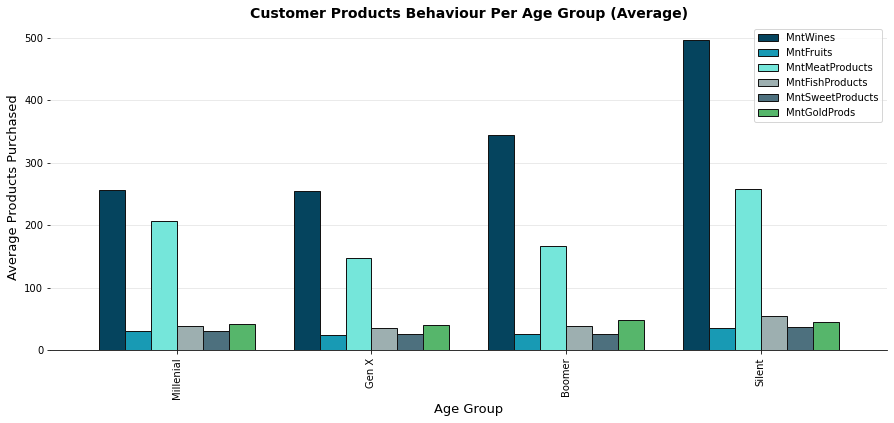

In [28]:
fig, ax = plt.subplots(figsize=(15, 6))

df = data[col_products+['Age']]

bins = [18, 35, 50, 70, 150]

labels = ['Millenial', 'Gen X', 'Boomer', 'Silent']
df['Age_Group'] = pd.cut(df.Age, bins=bins, labels=labels)
df = df.groupby('Age_Group').mean().reset_index()
df.plot(x='Age_Group', y=col_products, kind='bar', ax=ax, color=colors, width=0.8, edgecolor='#131313')

ax.set_title("Customer Products Behaviour Per Age Group (Average)", fontsize=14, fontweight='bold')
ax.set_ylabel('Average Products Purchased', fontsize=13)
ax.set_xlabel('Age Group', fontsize=13)
ax.yaxis.grid(alpha=0.33)
ax.set_axisbelow(True)

### Customer Income Pattern on Market

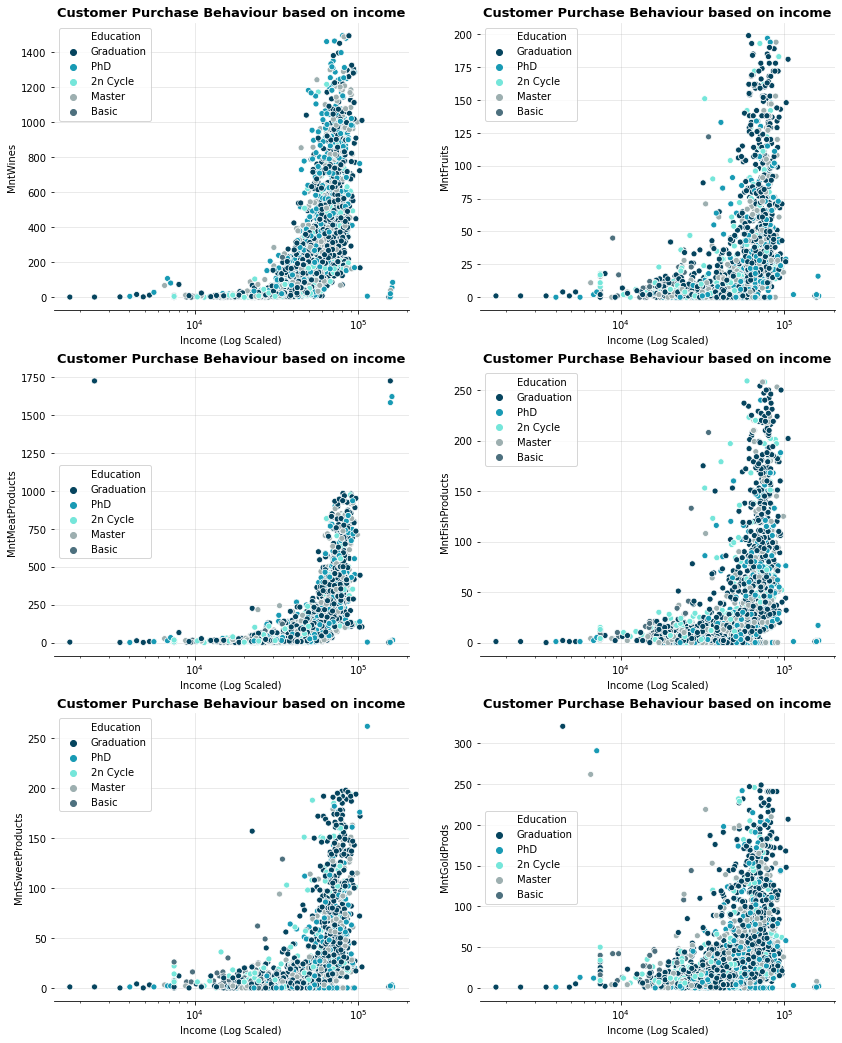

In [29]:
fig = plt.figure(figsize=(14, 18))

gs = fig.add_gridspec(3, 2) 

df_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df = data
ax = [None for i in range(len(df_columns))]
colors = ['#05445E','#189AB4','#75E6DA','#9DAFB0', '#4D707E']

ax[0] = fig.add_subplot(gs[0, 0]) 
sns.scatterplot(data=df, x='Income', y='MntWines', hue='Education', ax=ax[0], palette=colors)

ax[1] = fig.add_subplot(gs[0, 1]) 
sns.scatterplot(data=df, x='Income', y='MntFruits', hue='Education', ax=ax[1], palette=colors)

ax[2] = fig.add_subplot(gs[1, 0]) 
sns.scatterplot(data=df, x='Income', y='MntMeatProducts', hue='Education', ax=ax[2], palette=colors)

ax[3] = fig.add_subplot(gs[1, 1]) 
sns.scatterplot(data=df, x='Income', y='MntFishProducts', hue='Education', ax=ax[3], palette=colors)

ax[4] = fig.add_subplot(gs[2, 0]) 
sns.scatterplot(data=df, x='Income', y='MntSweetProducts', hue='Education', ax=ax[4], palette=colors)

ax[5] = fig.add_subplot(gs[2, 1]) 
sns.scatterplot(data=df, x='Income', y='MntGoldProds', hue='Education', ax=ax[5], palette=colors)


for ix in range(len(df_columns)) : 
    ax[ix].set_title(f"Customer Purchase Behaviour based on income", fontsize=13, fontweight='bold')
    ax[ix].set_ylabel(f'{df_columns[ix]}')
    ax[ix].yaxis.grid(alpha=0.33)
    ax[ix].xaxis.grid(alpha=0.33)
    ax[ix].set_xlabel('Income (Log Scaled)')
    ax[ix].set_xscale('log')
    ax[ix].set_axisbelow(True)


From this graph we can see that the more Income a person has, the more products that they will buy, the number of products tends to increase exponentially

### Offline vs Online Purchases

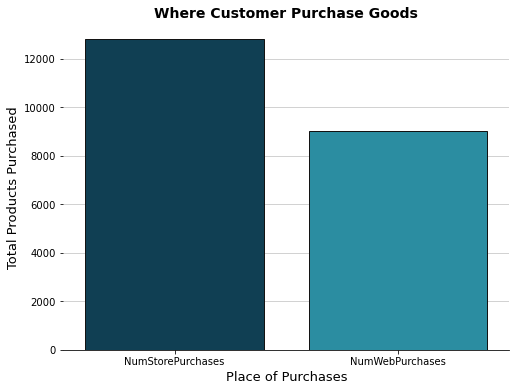

In [30]:
df_columns = ['NumStorePurchases', 'NumWebPurchases']

fig, ax = plt.subplots(figsize=(8,6))
df = data[df_columns].sum()
sns.barplot(df.index, df.values, palette=colors, ax=ax, edgecolor='#131313')

ax.set_title("Where Customer Purchase Goods", fontsize=14, fontweight='bold')
ax.set_ylabel('Total Products Purchased', fontsize=13)
ax.set_xlabel('Place of Purchases', fontsize=13)
ax.yaxis.grid(alpha=0.7)
ax.set_axisbelow(True)

Most of Customer buy the product offline rather than online

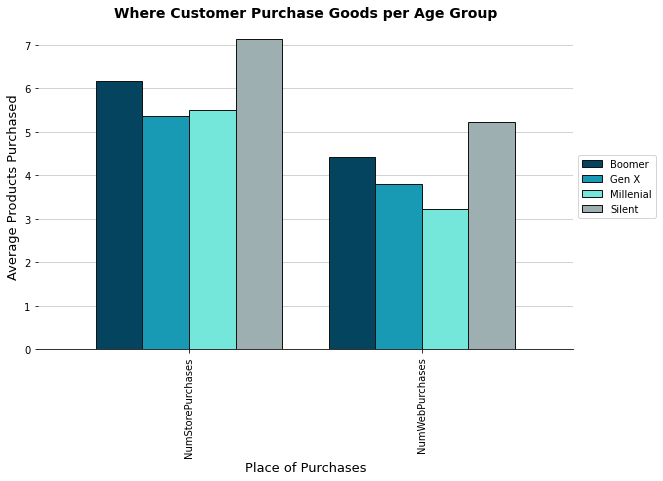

In [31]:
df_columns = ['NumStorePurchases', 'NumWebPurchases']

df = data[df_columns].groupby(data['Age Group']).mean()

fig, ax = plt.subplots(figsize=(12,6))

df.T.plot(kind='bar', color=colors, width=0.8, edgecolor='#131313', ax=ax)

ax.set_title("Where Customer Purchase Goods per Age Group", fontsize=14, fontweight='bold')
ax.set_ylabel('Average Products Purchased', fontsize=13)
ax.set_xlabel('Place of Purchases', fontsize=13)
ax.yaxis.grid(alpha=0.7)
ax.set_axisbelow(True)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


To be continued
